自動でセグメンテーション

In [5]:
from ultralytics.data.annotator import auto_annotate

auto_annotate(data="./wp4833224.jpg", det_model="yolov8x.pt", sam_model='sam_b.pt', output_dir="./data")


image 1/1 /home/shimoguchi/blackjack/SAM/wp4833224.jpg: 448x640 1 person, 2 ties, 53.3ms
Speed: 0.8ms preprocess, 53.3ms inference, 5.1ms postprocess per image at shape (1, 3, 448, 640)


セグメンテーション結果の確認

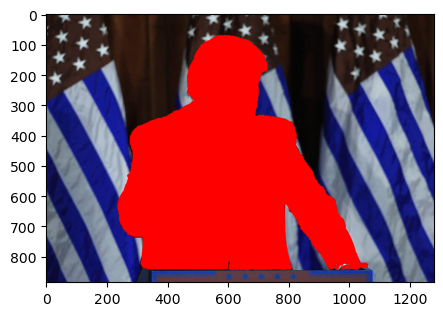

In [13]:
import cv2
import matplotlib.pyplot as plt

imgfile = "./wp4833224.jpg"
txtfile = "./data/wp4833224.txt"

img = cv2.imread(imgfile)
import numpy as np
cls = []
poly = []
w, h = img.shape[1], img.shape[0]
with open(txtfile, "r") as f :
  line = f.readline()
  x = list(map(float, line.split()))
  cls.append(int(x[0]))
  y = np.array(x[1:]).reshape(-1,2)
  y[:,0] = y[:,0] * w
  y[:,1] = y[:,1] * h
  poly.append(y)

for i, e in enumerate(poly) :
  pos = e.reshape((-1,1,2)).astype(np.int32)
  cv2.polylines(img, [pos], isClosed=True, color= (255, 0, 32*i), thickness=2)
  #マスク領域の塗りつぶし
  cv2.fillPoly(img, [pos], color= (255, 0, 32*i))

plt.figure(figsize=(5,5))
plt.imshow(img)

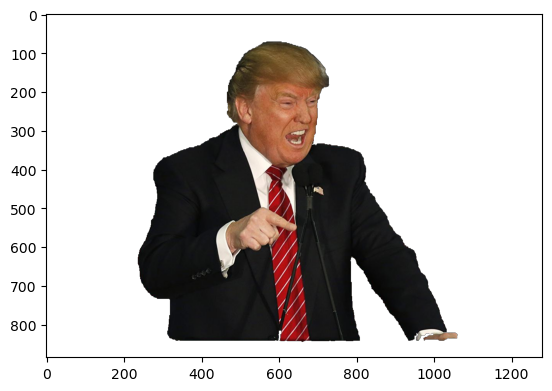

True

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgfile = "./wp4833224.jpg"
txtfile = "./data/wp4833224.txt"

img = cv2.imread(imgfile)
h, w = img.shape[:2]

result_img = np.zeros((h, w, 4), dtype=np.uint8)

poly = []
with open(txtfile, "r") as f:
    line = f.readline()
    x = list(map(float, line.split()))
    cls = int(x[0])
    y = np.array(x[1:]).reshape(-1,2)
    y[:,0] = y[:,0] * w
    y[:,1] = y[:,1] * h
    poly.append(y)

for e in poly:
    mask = np.zeros((h, w), dtype=np.uint8)
    pos = e.reshape((-1,1,2)).astype(np.int32)
    cv2.fillPoly(mask, [pos], color=255)
    for c in range(3):
        result_img[:,:,c][mask == 255] = img[:,:,c][mask == 255]
    result_img[:,:,3][mask == 255] = 255

plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGRA2RGBA))
plt.show()
# unityのasset/resourcesに保存するようにパスを更新
cv2.imwrite('output_image.png', result_img)
